Check Python version

In [88]:
!python --version

Python 3.10.13


Import libraries

In [89]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [90]:
# Through online GitHub
file_name = 'https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv'

In [91]:
train_df = pd.read_csv(file_name)

In [92]:
train_df.shape

(144, 2)

In [93]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [94]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [95]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Define the required time and target columns

In [96]:
time_col = train_df.columns[0]
target_col = train_df.columns[-1]
train_df[time_col] = train_df[time_col].astype(str)

Change target column to float

In [97]:
train_df[target_col] = train_df[target_col].astype(float)

In [98]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

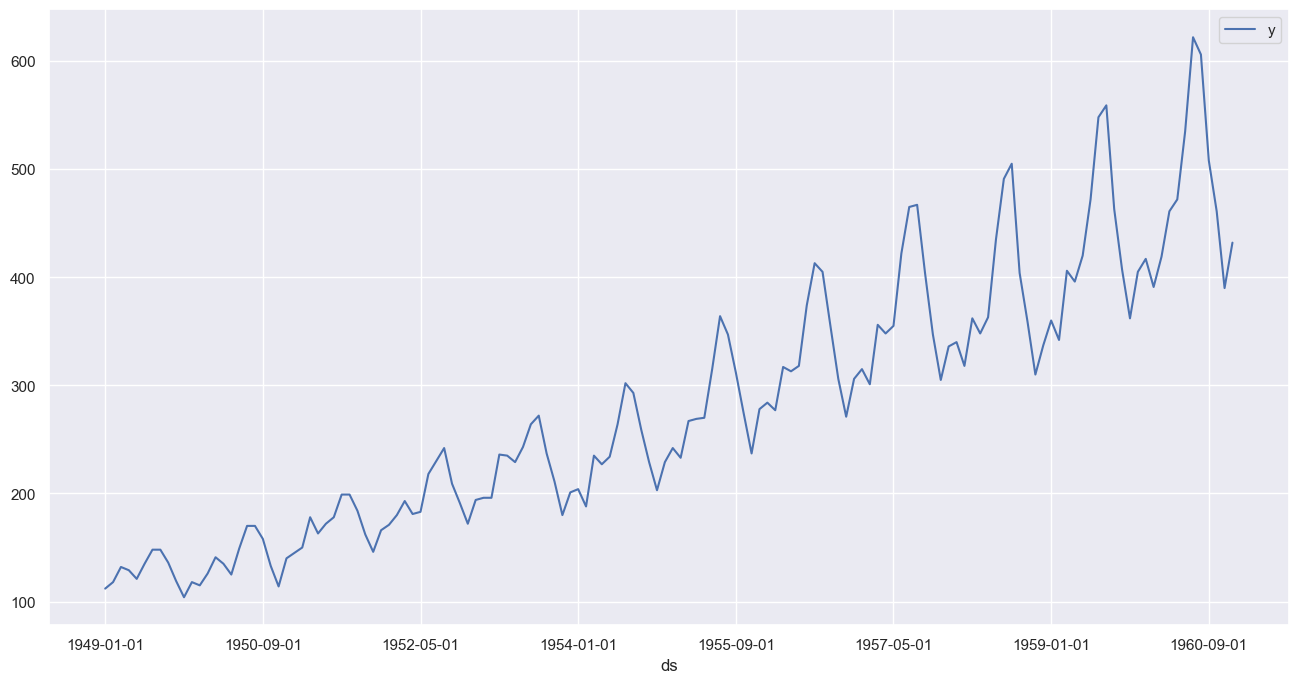

In [99]:
figsize = (16, 8)
train_df.set_index(time_col).plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [100]:
train_data = []

In [101]:
for value in train_df.values:
    train_data.append(list(value))

In [102]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Define Model Request (optional)

In [103]:
# # # Default model request
# # model_request = {
# #     'type': 'meta_lr',  # 'meta_wa'
# #     'scorers': ['smape', 'mape'],
# #     'params': {
# #         'preprocessors': [
# #             {'type': 'dartsimputer', 'params': {'strategy': 'mean'}},
# #             # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
# #             {'type': 'minmaxscaler'},
# #         ],
# #         'base_models': [
# #             {'type': 'darts_rnn'},
# #             {'type': 'darts_lightgbm'},
# #             {'type': 'darts_autotheta'},
# #             {'type': 'darts_autoarima'},
# #             {'type': 'darts_autoets'},
# #             # {'type': 'stats_autotheta'},
# #             # {'type': 'stats_autoarima'},
# #             # {'type': 'stats_autoets'},
# #         ],
# #     },
# # }

# # Customized model request
# model_request = {
#     'type': 'meta_lr',  # 'meta_wa'
#     'scorers': ['smape', 'mape'],
#     'params': {
#         'preprocessors': [
#             {'type': 'dartsimputer', 'params': {'strategy': 'mean'}},
#             # {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
#             {'type': 'minmaxscaler'},
#         ],
#         'base_models': [
#             {'type': 'darts_naive'},
#             {'type': 'darts_seasonalnaive'},
#             {'type': 'darts_autotheta'},
#             # {'type': 'stats_autotheta'},
#             {'type': 'darts_autoets'},
#             # {'type': 'stats_autoets'},
#             {'type': 'darts_autoarima'},
#             # {'type': 'stats_autoarima'},
#             {'type': 'darts_tbats'},
#             {'type': 'darts_linearregression'},
#             {'type': 'darts_lightgbm', 'params': {'lags': 12, 'output_chunk_length': 6, 'verbose': -1}},
#             {'type': 'darts_rnn', 'params': {'model': 'LSTM', 'hidden_dim': 10, 'n_rnn_layers': 3}},
#         ],
#     },
# }

In [104]:
file_path = 'model_request.json'
# file_path = 'model_request.yaml'

# For writing the model request to a json file
with open(file_path, 'r') as file:
    model_request = json.load(file)

# For reading the model request from a yaml file
# with open(file_path, 'r') as file:
#     model_request = yaml.safe_load(file)
print(model_request)

{'type': 'meta_lr', 'scorers': ['smape', 'mape'], 'params': {'preprocessors': [{'type': 'dartsimputer'}, {'type': 'minmaxscaler'}], 'base_models': [{'type': 'darts_naive'}, {'type': 'darts_seasonalnaive'}, {'type': 'darts_autotheta'}, {'type': 'darts_autoets'}, {'type': 'darts_autoarima'}, {'type': 'darts_tbats'}, {'type': 'darts_rnn', 'params': {'model': 'LSTM', 'hidden_dim': 10, 'n_rnn_layers': 3}}, {'type': 'darts_lightgbm', 'params': {'lags': 12, 'output_chunk_length': 6, 'verbose': -1}}, {'type': 'darts_linearregression'}]}}


Train API JSON Payload

In [105]:
api_json = {
    'data': train_data,
    'model': model_request  # (optional) can be commented out
}

Build URL

In [106]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [107]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [108]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [109]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 0 ns
Wall time: 2min 41s


In [110]:
train_json_out = response.json()  # dict output
train_json_out

{'model': 'AgEBCIBFCACARQgAtckFABQAAABcuAAAP4AAZWxpk4xvlGxvjG2UBGFplE1hgWlhaWGMjC5hC2WBH2FsjHKUFy5maWxOaWd9aXJhZYxygXSUjHhvYUR5fW9oH2F2lFaUlHNfeG94YWVwgWFwb3h0X2VlDWWUdGRzlF9lH3mTYWFhlGmUTnV0AlKU/31LhnVlcnJ1jHlDKFeHW/99H0uGBKgsxUl+Aje7P3X5LrI2zlKIDEHFSX8DOLxA2FySHxZLz1OIDELGSjG16m6jJ6vhZZoeojq+9HitMbXrb6QoH6xEyP6Ctzu/9HiuMrZO0geLwUXJ/oK4PMCmKmDkGZ0hH1fbEJQYsDRq7iOnK2DkGp4iuj509y2xNWruJKgsxEh9HwE3uz90+C6yNhyg1lqPE5fNUYaUlG6GdIZ0X2eMZZSCH4GMLmRzd5NkKACUaIiM//+UYlJVlE6UfZRvaX1hcmVkCZSUeCi4lACUaADghgAflHZzdGYKZ4ljjEt4jIxkdSmsaIUolJSUw4xOYQhlfYIKZWiHkFeHW/90AEDghgAflGlpCWh1jGmMYWl2ZQJvX25vdm91X3RzdXJyTmNjZXMOX3RldXaUc190Y3NfdGV0YAofZmVvYWxzcpNubmhkZW5Ob2lohwFDe4wLYWOUbGlhAWUecpRtDmVOfQ1hlCgoM2g6aGgolGh7fZSUgoFoTJRLiYHUH05ilJRIaA1oaAFCawPogIggJ8BZYPgAmDEVrrVOVe6GH40mLcZeQ9zje4MbtLtUW/OMApuiOkLac3oTGrJLMMjPH2hvCKCoQEjgeV32/ZadNs7VbnUOposjK8PLY/wDnKM7H9RK4uqCiiK7wlpi+pN4EBewt1Do8IiPKMGlPkXe5X0WHx22vVbu02tzCxKrREvj64MckioyytFqAwqiqmJLvHV1Hy9iTmhjZ0uUeGgBaIFoaIUoAQQAgIAgQOCAgADAAIDAH4Cg4ECgQEDAo

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [111]:
dates = [
    '1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01', '1961-05-01', '1961-06-01',
    '1961-07-01', '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
    '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01', '1962-05-01', '1962-06-01',
    '1962-07-01', '1962-08-01', '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
]

Model from Train API

In [112]:
model = train_json_out['model']

Forecast API JSON Payload

In [113]:
api_json = {
    'model': model,
    'data': dates
}

Build URL (same as train except for the endpoint)

In [114]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [115]:
%%time
response = requests.post(url, json=api_json)
print(response)
print()

<Response [200]>

CPU times: total: 15.6 ms
Wall time: 2.21 s


In [116]:
forecast_json_out = response.json()  # dict output
forecast_json_out

{'data': [['1960-12-31T00:00:00', 4556146598.865828],
  ['1961-01-30T00:00:00', 4556146575.588465],
  ['1961-03-01T00:00:00', 4556146601.107],
  ['1961-03-31T00:00:00', 4556146643.998194],
  ['1961-04-30T00:00:00', 4556146664.7694],
  ['1961-05-30T00:00:00', 4556146750.755911],
  ['1961-06-29T00:00:00', 4556146824.80361],
  ['1961-07-29T00:00:00', 4556146818.926607],
  ['1961-08-28T00:00:00', 4556146727.743097],
  ['1961-09-27T00:00:00', 4556146674.052443],
  ['1961-10-27T00:00:00', 4556146601.562498],
  ['1961-11-26T00:00:00', 4556146659.28079],
  ['1961-12-26T00:00:00', 4556146649.24143],
  ['1962-01-25T00:00:00', 4556146624.552622],
  ['1962-02-24T00:00:00', 4556146656.534708],
  ['1962-03-26T00:00:00', 4556146697.632521],
  ['1962-04-25T00:00:00', 4556146719.020174],
  ['1962-05-25T00:00:00', 4556146811.147879],
  ['1962-06-24T00:00:00', 4556146891.657137],
  ['1962-07-24T00:00:00', 4556146885.465754],
  ['1962-08-23T00:00:00', 4556146785.406092],
  ['1962-09-22T00:00:00', 45561467

Combine forecast dates and output

In [117]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col],
)

In [118]:
forecast_df.shape

(24, 2)

In [119]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [120]:
forecast_df.head()

,ds,y
0,1960-12-31T00:00:00,4.556147e+09
1,1961-01-30T00:00:00,4.556147e+09
2,1961-03-01T00:00:00,4.556147e+09
3,1961-03-31T00:00:00,4.556147e+09
4,1961-04-30T00:00:00,4.556147e+09


In [121]:
forecast_df.tail()

,ds,y
19,1962-07-24T00:00:00,4.556147e+09
20,1962-08-23T00:00:00,4.556147e+09
21,1962-09-22T00:00:00,4.556147e+09
22,1962-10-22T00:00:00,4.556147e+09
23,1962-11-21T00:00:00,4.556147e+09


Plot train and forecast side-by-side

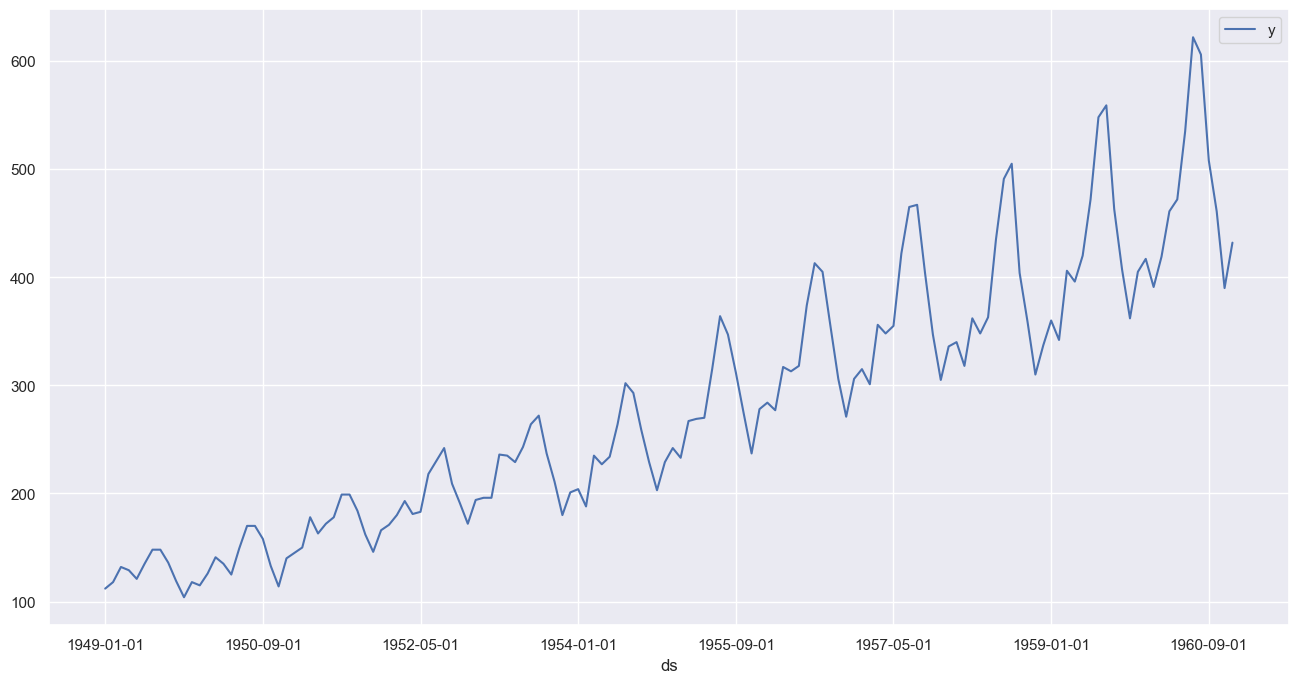

In [122]:
train_df['color'] = 'b'
train_df.set_index(time_col).plot(figsize=figsize, color=train_df['color']);

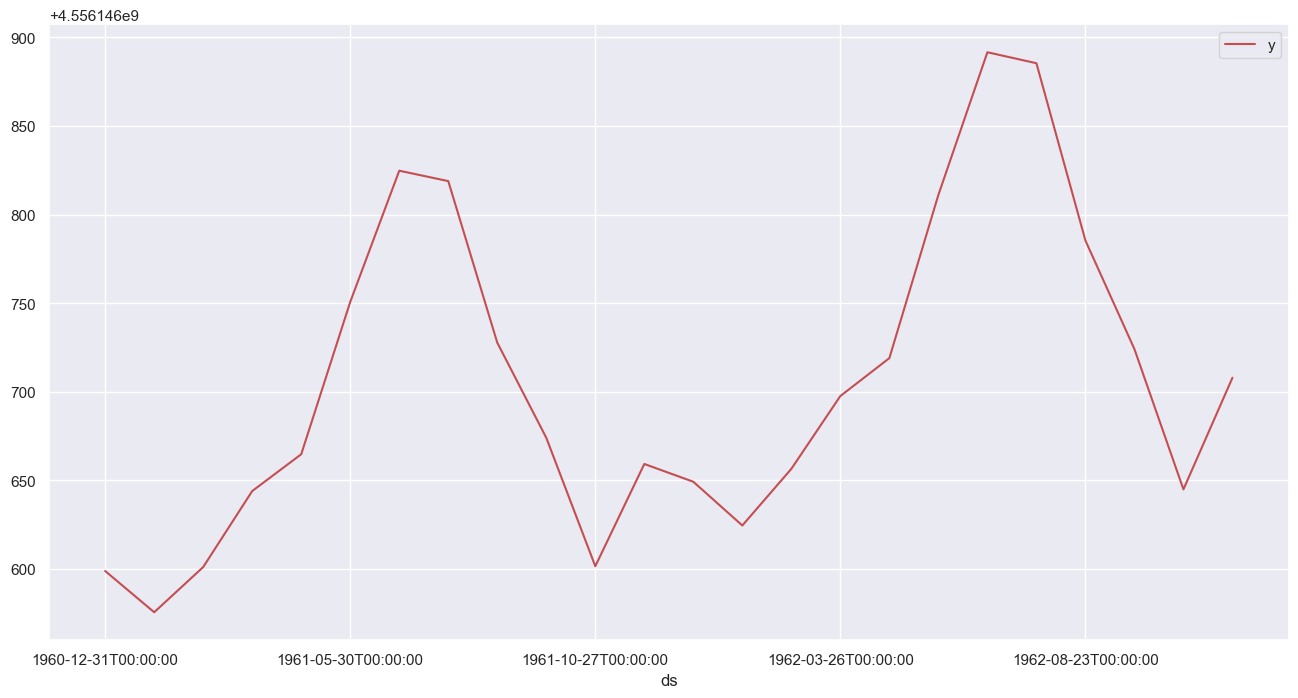

In [123]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and forecast sets

In [124]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [125]:
df.shape

(168, 3)

In [126]:
df.head()

,ds,y,color
0,1949-01-01,112.0,b
1,1949-02-01,118.0,b
2,1949-03-01,132.0,b
3,1949-04-01,129.0,b
4,1949-05-01,121.0,b


In [127]:
df.tail()

,ds,y,color
163,1962-07-24T00:00:00,4.556147e+09,r
164,1962-08-23T00:00:00,4.556147e+09,r
165,1962-09-22T00:00:00,4.556147e+09,r
166,1962-10-22T00:00:00,4.556147e+09,r
167,1962-11-21T00:00:00,4.556147e+09,r


Plot combined train and forecast sets with the vertical black line as the cut-off

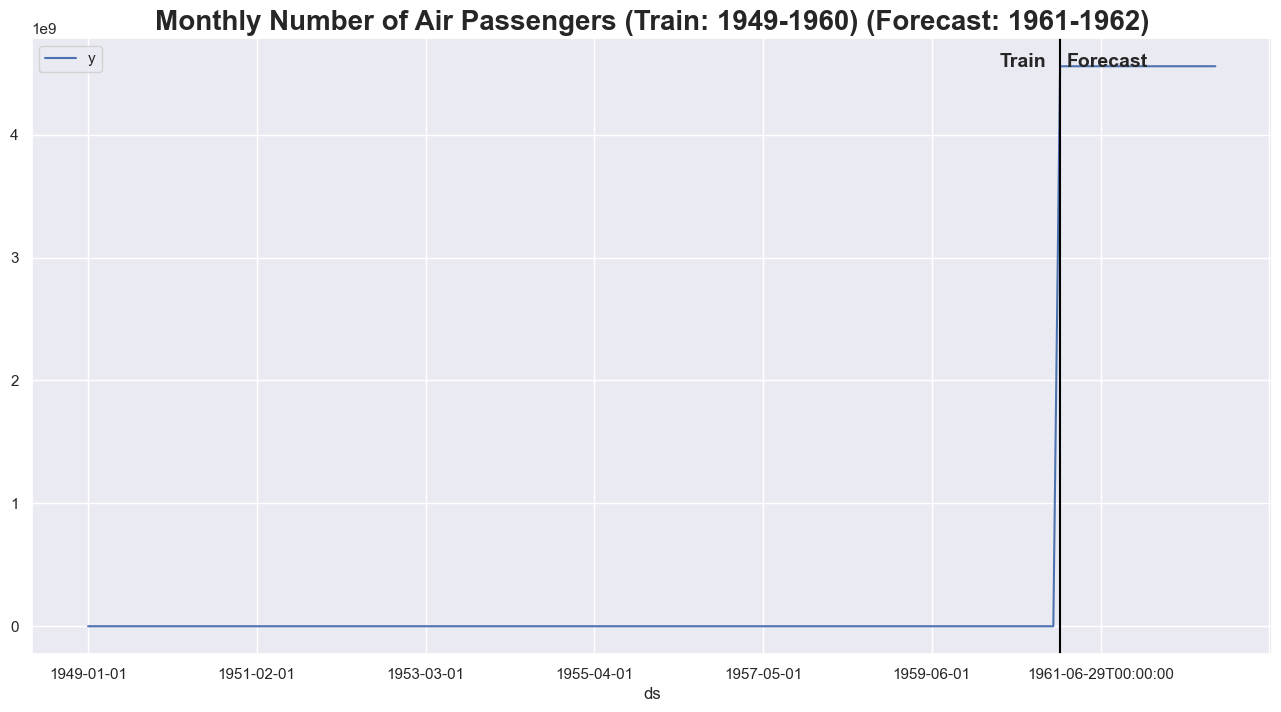

In [128]:
df.set_index(time_col).plot(figsize=figsize, color=df['color'])
plt.axvline(x=len(train_df), color='black', label='Train/Forecast set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Forecast', fontweight='bold', fontsize=14)
plt.title(label='Monthly Number of Air Passengers (Train: 1949-1960) (Forecast: 1961-1962)', fontweight='bold', fontsize=20)
plt.show();

In [129]:
print(train_data[-1] , forecast_df.head(1))

['1960-12-01', 432.0]                     ds             y color
0  1960-12-31T00:00:00  4.556147e+09     r
